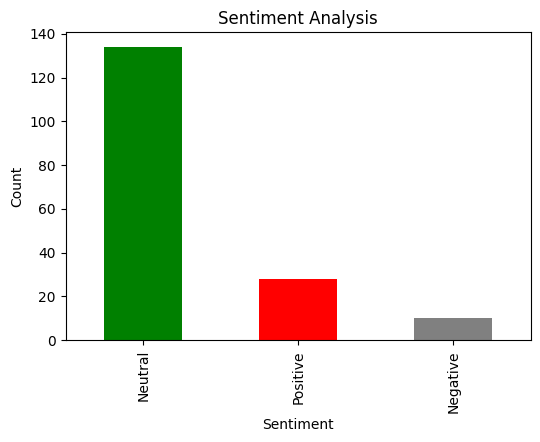

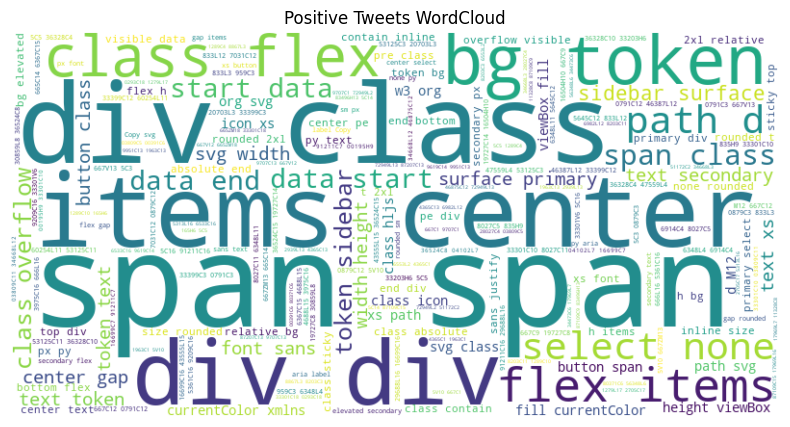

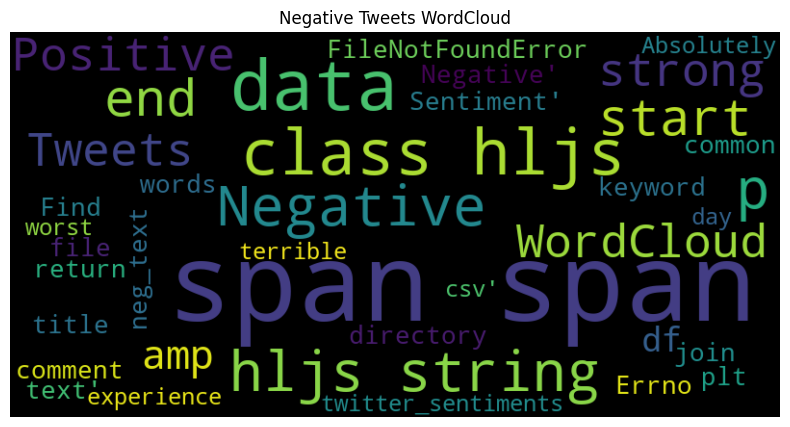

Top Positive Words: [('items-center', 60), ('3.16504', 48), ('16.835', 48), ('18.165', 48), ('1.83496', 48), ('class="flex', 36), ('12.668', 36), ('14.211', 36), ('16.8341', 36), ('18.1657', 36)]
Top Negative Words: [('</span><span><span', 5), ('<p', 3), ('for', 3), ('Positive', 3), ('&amp;', 3), ('Negative', 3), ('data-start="1584"', 2), ('the', 2), ('class="hljs-keyword">return</span></span><span>', 1), ('class="hljs-string">"Negative"</span></span><span>', 1)]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px
from collections import Counter

df = pd.read_csv(r"C:\Users\mukke\Downloads\twitter.csv", on_bad_lines="skip", engine="python")
df.drop_duplicates(inplace=True)

text_column = "content" if "content" in df.columns else df.columns[0]
df.dropna(subset=[text_column], inplace=True)

def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df[text_column].apply(get_sentiment)

sentiment_counts = df["Sentiment"].value_counts()
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["green", "red", "gray"])
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ["Sentiment", "Count"]

fig = px.bar(
    sentiment_counts_df,
    x="Sentiment",
    y="Count",
    labels={"Sentiment": "Sentiment", "Count": "Count"},
    color="Sentiment"
)
fig.show(renderer="vscode")

pos_text = " ".join(df[df["Sentiment"] == "Positive"][text_column])
neg_text = " ".join(df[df["Sentiment"] == "Negative"][text_column])

pos_wc = WordCloud(width=800, height=400, background_color="white").generate(pos_text)
neg_wc = WordCloud(width=800, height=400, background_color="black").generate(neg_text)

plt.figure(figsize=(10, 5))
plt.imshow(pos_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Tweets WordCloud")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(neg_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Tweets WordCloud")
plt.show()

df.to_csv("sentiment_results.csv", index=False)

positive_words = " ".join(df[df["Sentiment"] == "Positive"][text_column]).split()
negative_words = " ".join(df[df["Sentiment"] == "Negative"][text_column]).split()

print("Top Positive Words:", Counter(positive_words).most_common(10))
print("Top Negative Words:", Counter(negative_words).most_common(10))
